## The Sequential Model:

###### The simplest way to build a Keras model

###### Method 1:

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

2024-01-13 20:50:20.812922: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model_1 = keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

###### Method 2: build the same model incrementally

In [3]:
model_2 = keras.Sequential()
model_2.add(layers.Dense(64,activation="relu"))
model_2.add(layers.Dense(10,activation="softmax"))

the preceding Sequential model does not have any weights until you **actually call it on some data**, or **call its build() method** with an input shape

In [4]:
model_2.weights

ValueError: Weights for model 'sequential_1' have not yet been created. Weights are created when the model is first called on inputs or `build()` is called with an `input_shape`.

In [6]:
model_1.build(input_shape=(None,3))

In [7]:
model_1.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.09300102,  0.27010828,  0.27778238, -0.2963469 , -0.27306196,
         -0.0090878 , -0.06362864,  0.02648059,  0.2671584 , -0.1798197 ,
         -0.21517628, -0.2582366 , -0.2922574 ,  0.00243115, -0.2293401 ,
          0.10958794,  0.09801966,  0.08653352, -0.13266955, -0.15765998,
          0.27369344, -0.09521294,  0.11192828,  0.25934845,  0.08088559,
          0.29115617, -0.14652151, -0.25919217, -0.16750364,  0.24034643,
          0.1042448 , -0.15881959,  0.03722915,  0.13511369,  0.2987792 ,
          0.21658409,  0.0596219 , -0.15353246,  0.24998498,  0.06685546,
         -0.26027477, -0.13758902, -0.00350702, -0.13071206, -0.00419572,
         -0.11774673, -0.26770967, -0.07712208,  0.06836867, -0.12462176,
          0.12354857, -0.14861248,  0.09750319,  0.03841382, -0.17177999,
         -0.24721584,  0.23273402, -0.20772448, -0.13634886,  0.05762404,
         -0.26429498, -0.2865593 ,  0.1868330

Builds the model—now the model will expect samples to be:
- of shape (3,).
- The None in the input shape signals that **the batch size could be anything**.

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### Naming models and layers with the name argument

In [9]:
model_named = keras.Sequential(name = "my_example_model")
model_named.add(layers.Dense(64, activation = "relu",name = "my_first_layer"))
model_named.add(layers.Dense(10, activation = "softmax",name = "my_second_layer"))

In [10]:
model_named.build(input_shape=(None,3))

In [11]:
model_named.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_second_layer (Dense)     (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


There’s actually a way to have your Sequential built on the fly: just declare the shape of the model’s inputs in advance. You can do this via the Input class.

### Specifying the input shape of your model in advance

In [12]:
model_input_specified = keras.Sequential(name="model_with_specified_input_shape")
model_input_specified.add(keras.Input(shape=(3,)))
model_input_specified.add(layers.Dense(64, activation = "relu",name = "my_first_layer"))
model_input_specified.add(layers.Dense(10, activation = "softmax",name = "my_second_layer"))

In [13]:
model_input_specified.summary()

Model: "model_with_specified_input_shape"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_second_layer (Dense)     (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## The Functional API:

##### A simple Functional model with two Dense layers

In [14]:
# First step: declaring an Input (note that you can also give names to these input objects, like everything else)
inputs = keras.Input(shape=(3,),name="my_input")
#Next, we created a layer and called it on the inputs tensor(actually a symbolic tensor):because It doesn’t contain any actual data,
# but it encodes the specifications of the actual tensors of data that the model will see when you use it. 
# It stands for future tensors of data.
features = layers.Dense(64,activation="relu")(inputs)
# Last, After obtaining the final outputs, we instantiated the model by specifying its inputs and outputs in the Model constructor
outputs = layers.Dense(10,activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
features.shape

TensorShape([None, 64])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


##### MULTI-INPUT, MULTI-OUTPUT MODELS

###### Example : A system to rank customer support tickets by priority and route them to the appropriate department
###### Inputs are :
- The title of the ticket (text input)
- The text body of the ticket (text input)
- Any tags added by the user (categorical input, assumed here to be one-hot encoded)

###### Outputs are :
- The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
- The department that should handle the ticket (a softmax over the set of departments)

In [17]:
vocabulary_size = 10000 # Represents the size of the input layer for the title with a shape of (vocabulary_size,).
num_tags = 100 # Input layer representing tags associated with the text with a shape of (num_tags,)
num_departments = 4

## DEFINE Inputs to the model
title = keras.Input(shape = (vocabulary_size,),name = "title")
text_body = keras.Input(shape = (vocabulary_size,),name = "text_body")
tags_input = keras.Input(shape = (num_tags,),name = "tags_input")

## Concatenate to create features layer
features = layers.Concatenate()([title,text_body,tags_input])
## Apply an intermediate layer to recombine input features into richer representations.
features = layers.Dense(64, activation ="relu")(features)

## Define priority score output
score_output = layers.Dense(1,activation = "sigmoid", name = "priority")(features)
## Department output 
department_output = layers.Dense(num_departments,activation = "softmax",name="Department_specified")(features)

In [18]:
multi_io_model = keras.Model(inputs=[title, text_body, tags_input],
                       outputs=[score_output, department_output])
# The Functional API is a simple, LEGO-like, yet very flexible way to define arbitrary graphs of layers like these.

In [19]:
import numpy as np
# Example text input
ticket_text = "Hello, I'm experiencing issues with my internet connection. It keeps disconnecting frequently."
# Example department and priority score
department = "Technical Support"
priority = 0.9

# Tokenize the text input
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts([ticket_text])
text_encoded = tokenizer.texts_to_matrix([ticket_text], mode='binary')

# Create one-hot encoded department vector
department_encoded = np.zeros(num_departments)
department_index = {"Technical Support": 0, "Billing": 1, "Product Inquiry": 2, "General Inquiry": 3}
department_encoded[department_index[department]] = 1

# Create numpy array for the priority score
priority_score = np.array([[priority]])

In [20]:
multi_io_model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "Department_specified":"categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "Department_specified":["accuracy"]})

In [21]:
title_data = text_encoded
text_body_data = text_encoded
tags_data = np.zeros(num_tags)
tags_data = tags_data.reshape(1,-1)
department_data = department_encoded.reshape(1, -1)



In [22]:
## Train_model for low number_of_epochs
multi_io_model.fit({"title": title_data, "text_body": text_body_data,"tags_input": tags_data},
          {"priority": priority_score, "Department_specified": department_data},epochs=1)
multi_io_model.evaluate({"title": title_data, "text_body": text_body_data,"tags_input": tags_data},
{"priority": priority_score, "Department_specified": department_data}) 
priority_preds, department_preds = multi_io_model.predict(
    {"title": title_data, "text_body": text_body_data, "tags_input": tags_data})

1/1 [==============================] - 0s 127ms/step


In [23]:
priority_preds

array([[0.5299287]], dtype=float32)

In [24]:
department_preds

array([[0.34342095, 0.23479526, 0.24192351, 0.17986034]], dtype=float32)

In [25]:
department_data

array([[1., 0., 0., 0.]])

We can see that the model didn't train long enough to predict the only input right so lets's increase number of epochs for training to overfit.

In [26]:
## Train_model for low number_of_epochs
multi_io_model.fit({"title": title_data, "text_body": text_body_data,"tags_input": tags_data},
          {"priority": priority_score, "Department_specified": department_data},epochs=100)
multi_io_model.evaluate({"title": title_data, "text_body": text_body_data,"tags_input": tags_data},
{"priority": priority_score, "Department_specified": department_data}) 
priority_preds, department_preds = multi_io_model.predict(
    {"title": title_data, "text_body": text_body_data, "tags_input": tags_data})

Epoch 1/100
1/1 [==============================] - 0s 22ms/step - loss: 1.2058 - priority_loss: 0.1370 - Department_specified_loss: 1.0688 - priority_mean_absolute_error: 0.3701 - Department_specified_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 1.0536 - priority_loss: 0.1242 - Department_specified_loss: 0.9294 - priority_mean_absolute_error: 0.3524 - Department_specified_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.9342 - priority_loss: 0.1133 - Department_specified_loss: 0.8210 - priority_mean_absolute_error: 0.3365 - Department_specified_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 0.8340 - priority_loss: 0.1035 - Department_specified_loss: 0.7304 - priority_mean_absolute_error: 0.3218 - Department_specified_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.7479 - priority_loss: 0.0948 - Department_specified_lo

In [27]:
priority_preds

array([[0.9008897]], dtype=float32)

In [28]:
department_preds

array([[9.987924e-01, 4.287491e-04, 6.850473e-04, 9.370106e-05]],
      dtype=float32)

##### We can see that the model here puts the highest probabilty to the right department and a very close number to the real priority

##### THE POWER OF THE FUNCTIONAL API: ACCESS TO LAYER CONNECTIVITY

In [29]:
# Plot a Functional model as a graph
keras.utils.plot_model(multi_io_model,to_file ="multi_io_model_functional.pdf")

In [30]:
# You can add to this plot the input and output shapes of each layer in the model, which can be helpful during debugging
keras.utils.plot_model(multi_io_model, "ticket_classifier_with_shape_info.pdf", show_shapes=True)
# The “None” in the tensor shapes represents the batch size: this model allows batches of any size.

In [31]:
multi_io_model.layers

In [32]:
multi_io_model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags_input')>]

In [33]:
multi_io_model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [34]:
multi_io_model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>

#### Creating a new model by reusing intermediate layer outputs

In [35]:
# layers[4] is our intermediate Dense layer
features_req = multi_io_model.layers[4].output
## Adding difficulty output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features_req)
## Creating new model
new_model_io = keras.Model(inputs=[title, text_body, tags_input], 
                           outputs=[score_output, department_output, difficulty])

In [36]:
keras.utils.plot_model(
    new_model_io, "updated_ticket_classifier.pdf", show_shapes=True)

## Subclassing the Model class:

It is the most advanced one. Subclassing Model is pretty similar:
- In the __init__() method, define the layers the model will use.
- In the call() method, define the forward pass of the model, reusing the layers previously created.
- Instantiate your subclass, and call it on data to create its weights

###### A simple subclassed model:

In [37]:
class CustomerTicketModel(keras.Model):
    def __init__(self,num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation = "relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid",name="priority")
        self.department_classifier = layers.Dense(num_departments,activation = "softmax",name ="department")


    def call(self,inputs):
        #Call function defines the forward pass for the model
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags_input = inputs["tags"]
        # Concatenate inputs and extract features from the mixing layer
        features = self.concat_layer([title,text_body,tags_input])
        features = self.mixing_layer(features)
        # Get the outputs
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority,department
        

In [38]:
subclass_model = CustomerTicketModel(num_departments=4)
priority, department = subclass_model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})


In [39]:
subclass_model.layers[0].name

'concatenate_1'

In [40]:
subclass_model.compile(optimizer="rmsprop",
              loss=[ "mean_squared_error","categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

In [41]:
subclass_model.layers[1].weights

[<tf.Variable 'customer_ticket_model/dense_7/kernel:0' shape=(20100, 64) dtype=float32, numpy=
 array([[-0.0158067 , -0.01025675,  0.00256464, ...,  0.00309089,
          0.01057186,  0.00579896],
        [ 0.01597054, -0.01224237, -0.01332647, ...,  0.00870516,
         -0.00602563,  0.01266253],
        [-0.01298345, -0.00670556, -0.01568459, ...,  0.01342695,
         -0.01549362, -0.00273241],
        ...,
        [-0.01204981, -0.01336396, -0.00196782, ..., -0.01147019,
         -0.00569996, -0.00258988],
        [-0.01417327,  0.00237141, -0.00037594, ..., -0.01665332,
          0.00068043,  0.01009944],
        [ 0.00180505,  0.00479469, -0.01505111, ...,  0.01583019,
         -0.0044933 , -0.0012497 ]], dtype=float32)>,
 <tf.Variable 'customer_ticket_model/dense_7/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [42]:
subclass_model.fit({"title": title_data, "text_body": text_body_data,"tags": tags_data},
          [ priority_score, department_data],epochs=1)


1/1 [==============================] - 1s 1s/step - loss: 1.5550 - output_1_loss: 0.1670 - output_2_loss: 1.3880 - output_1_mean_absolute_error: 0.4087 - output_2_accuracy: 0.0000e+00


In [43]:
subclass_model.evaluate({"title": title_data, "text_body": text_body_data,"tags": tags_data}, 
                        [priority_score, department_data])

1/1 [==============================] - 0s 292ms/step - loss: 1.3292 - output_1_loss: 0.1705 - output_2_loss: 1.1587 - output_1_mean_absolute_error: 0.4129 - output_2_accuracy: 1.0000


[1.3292113542556763,
 0.1704850047826767,
 1.1587263345718384,
 0.41289830207824707,
 1.0]

In [44]:
priority_preds, department_preds = subclass_model.predict({"title": title_data, "text_body": text_body_data,"tags": tags_data})

1/1 [==============================] - 0s 95ms/step


In [45]:
priority_preds

array([[0.48710167]], dtype=float32)

In [46]:
department_preds

array([[0.31388572, 0.2303415 , 0.20782499, 0.24794778]], dtype=float32)

#### Creating a Functional model that includes a subclassed model

In [47]:
class Classifier_model(keras.Model):
    def __init__(self,num_classes):
        super().__init__()
        if num_classes==2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self,inputs):
        return self.dense(inputs)
        

In [48]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64,activation="relu")(inputs)
outputs = Classifier_model(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)


#### Creating a subclassed model that includes a Functional model

In [49]:
inputs = keras.Input(shape = (64,))
outputs = layers.Dense(1, activation = "sigmoid")(inputs)
binary_classifier = keras.Model(inputs = inputs,outputs = outputs)

In [50]:
class MyModel(keras.Model):
    def __init__(self,num_classes =2):
        super().__init__()
        self.dense = layers.Dense(64,activation ="relu")
        self.classifier = binary_classifier

    def call(self,inputs):
        features = self.dense(features)
        return self.classifier(features)

model = MyModel()
    

#### The standard workflow: compile(), fit(), evaluate(), predict()

In [51]:
from tensorflow.keras.datasets import mnist

def get_mnis_model():
    inputs = keras.Input(shape = (28*28,))
    features = layers.Dense(512,activation = "relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation = "softmax")(features)
    model = keras.Model(inputs = inputs, outputs = outputs)
    return model

In [52]:
# Load your data, reserving some for validation and scaling it
(images,labels),(test_images,test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255 
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [53]:
model = get_mnis_model()
#Compile the model by specifying its optimizer, the loss function to minimize, and the metrics to monitor.
model.compile(optimizer = "rmsprop",
             loss = "sparse_categorical_crossentropy",
             metrics =["accuracy"])
#Use fit() to train the model, optionally providing validation data to monitor performance on unseen data
model.fit(train_images, train_labels,epochs=3,validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels) # Use evaluate() to compute the loss and metrics on new data.
predictions = model.predict(test_images) # Use predict() to compute classification probabilities on new data

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2949 - accuracy: 0.9115 - val_loss: 0.1425 - val_accuracy: 0.9581
Epoch 2/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1589 - accuracy: 0.9537 - val_loss: 0.1137 - val_accuracy: 0.9690
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


In [54]:
test_metrics

[0.09369555115699768, 0.9735999703407288]

#### Implementing a custom metric by subclassing the Metric class

In [55]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self,name="rmse", **kwargs):
        super().__init__(name= name,**kwargs)
        #Define the state variables in the constructor. Like for layers, you have access to the add_weight() method.
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name = "total_samples",initializer="zeros", dtype="int32")


    def update_state(self,y_true, y_pred, sample_weight=None):
        #To match our MNIST model, we expect categorical predictions and integer labels
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred)) ## compute mean square error for this state
        self.mse_sum.assign_add(mse) # add it to the mse_sum
        num_samples = tf.shape(y_pred)[0] # Get the number of samples in the batch 
        self.total_samples.assign_add(num_samples) # add it to total_samples variable


    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast(self.total_samples,tf.float32))

    # to reset the metric state without having to reinstantiate it
    # this enables the same metric objects to be used across different epochs of training or across both training and evaluation
    def reset_state(self): 
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)


        
    

In [56]:
model = get_mnis_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,epochs=3,validation_data=(val_images, val_labels)) 
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2940 - accuracy: 0.9127 - rmse: 7.1760 - val_loss: 0.1564 - val_accuracy: 0.9544 - val_rmse: 7.3505
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1622 - accuracy: 0.9535 - rmse: 7.3504 - val_loss: 0.1113 - val_accuracy: 0.9679 - val_rmse: 7.4028
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9722 - rmse: 7.4318


### Using callbacks(THE EARLYSTOPPING AND MODELCHECKPOINT CALLBACKS):

In [57]:
callbacks_list = [
    keras.callbacks.EarlyStopping( # Interrupts training when improvement stops
        monitor="val_accuracy", # Monitors the model’s validation accuracy
        patience=2,),# Interrupts training when accuracy has stopped improving for two complete epochs
    keras.callbacks.ModelCheckpoint( # Saves the current weights after every epoch
        filepath="checkpoint_path.keras", # Path to the destination model file
        monitor="val_loss", # These two arguments mean you won’t overwrite the model file unless val_loss has improved,
        save_best_only=True, # which allows you to keep the best model seen during training
)]

In [58]:
model_mnist = get_mnis_model()

model_mnist.compile(optimizer = "rmsprop",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

model_mnist.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels)) # Note that because the callback
# will monitor validation loss and validation accuracy, you need to pass validation_data to the call to fit().
  


Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.1495 - val_accuracy: 0.9556
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1601 - accuracy: 0.9537 - val_loss: 0.1175 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1318 - accuracy: 0.9636 - val_loss: 0.1009 - val_accuracy: 0.9726
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1139 - accuracy: 0.9679 - val_loss: 0.0921 - val_accuracy: 0.9763
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1012 - accuracy: 0.9726 - val_loss: 0.0969 - val_accuracy: 0.9763
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0954 - accuracy: 0.9729 - val_loss: 0.0986 - val_accuracy: 0.9764
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0901 - accuracy: 0.9757 - val_loss: 0.0935 - val_ac

In [59]:
model_checkpoint = keras.models.load_model("checkpoint_path.keras")

In [61]:
model_checkpoint.layers

In [66]:
model_checkpoint.weights[0][0]

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 1.72143057e-02,  5.33041731e-02, -2.11188607e-02,  2.34439448e-02,
       -2.48031951e-02,  5.72540015e-02,  3.67634669e-02,  1.83934942e-02,
        5.95329255e-02,  1.12114474e-02, -4.58365344e-02,  6.15462512e-02,
       -5.45365214e-02,  6.10567778e-02,  5.42108268e-02, -2.91005895e-02,
        3.66051346e-02, -5.37955984e-02, -3.27389836e-02,  3.31528932e-02,
       -5.84965721e-02, -4.45696041e-02,  3.44118774e-02, -3.30656506e-02,
       -9.57584754e-03,  5.10456413e-02,  2.79021785e-02, -5.28070740e-02,
       -5.20403758e-02,  4.34310734e-03, -1.19869225e-02,  1.55859441e-02,
        5.32143041e-02, -2.90853418e-02, -5.81286810e-02, -6.14078455e-02,
        2.31676623e-02, -4.06935513e-02,  1.49313733e-02,  6.02196902e-03,
       -1.71985589e-02,  3.32952589e-02, -6.08684868e-02,  5.46014234e-02,
       -1.96977705e-02, -5.41275740e-02, -5.75990714e-02,  1.35181472e-02,
       -3.02809738e-02, -4.36169468e-02, -1.18226707

#### Creating a custom callback by subclassing the Callback class

In [72]:
import matplotlib.pyplot as plt

class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"losses_epochs/plot_at_epoch_{epoch}")
        self.per_batch_losses = []
        

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2921 - accuracy: 0.9123 - val_loss: 0.1470 - val_accuracy: 0.9588
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1604 - accuracy: 0.9533 - val_loss: 0.1185 - val_accuracy: 0.9667
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1318 - accuracy: 0.9643 - val_loss: 0.1040 - val_accuracy: 0.9725
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1144 - accuracy: 0.9686 - val_loss: 0.0976 - val_accuracy: 0.9733
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1044 - accuracy: 0.9714 - val_loss: 0.0968 - val_accuracy: 0.9754
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0957 - accuracy: 0.9744 - val_loss: 0.0926 - val_accuracy: 0.9771
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0883 - accuracy: 0.9765 - val_loss: 0.0908 - val_ac

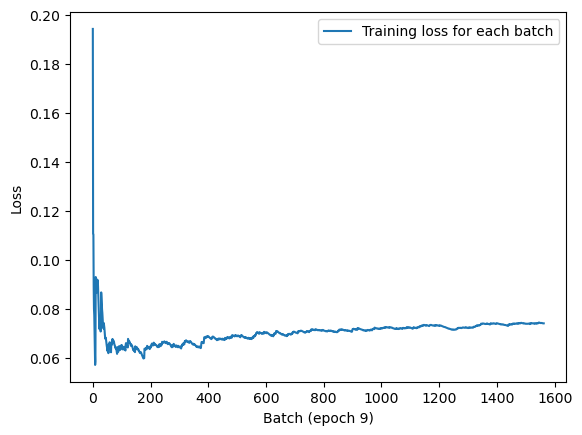

In [73]:
model = get_mnis_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

#### Monitoring and visualization with TensorBoard 

In [75]:
model = get_mnis_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
tensorboard = keras.callbacks.TensorBoard(
    log_dir="/Users/macbookpro/Desktop/Study/Deep_Learning/Deep_Learning_Keras/Tensor_board",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2946 - accuracy: 0.9116 - val_loss: 0.1543 - val_accuracy: 0.9549
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1619 - accuracy: 0.9539 - val_loss: 0.1256 - val_accuracy: 0.9650
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1302 - accuracy: 0.9634 - val_loss: 0.0991 - val_accuracy: 0.9727
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1138 - accuracy: 0.9682 - val_loss: 0.0861 - val_accuracy: 0.9759
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1048 - accuracy: 0.9707 - val_loss: 0.0949 - val_accuracy: 0.9761
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0956 - accuracy: 0.9749 - val_loss: 0.0943 - val_accuracy: 0.9776
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0877 - accuracy: 0.9766 - val_loss: 0.0911 - val_ac

### Custom Train Function:

In [80]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape: # TensorFlow provides the tf.GradientTape API for automatic differentiation; 
        #that is, computing the gradient of computation for some inputs, 
        #usually tf.Variables. 
        #TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". 
        #TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.
        predictions = model(inputs,training=True) # First pass the inputs to the model to perform the forward pass
        loss = loss_fn(targets, predictions) # Then, compute the loss function between the predictions and targets
        gradients = tape.gradient(loss, model.trainable_weights) # After compute gradients of trainable weights
        optimizer.apply_gradients(zip(model.trainable_weights, gradients)) # Update the model’s weights
                                                                           #to lower the loss value on the current batch of data.

### Low-level usage of metrics

In [81]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] 
metric.update_state(targets, predictions) 
current_result = metric.result() 
print(f"result: {current_result:.2f}")


result: 1.00


In [82]:
values = [0, 1, 2, 3, 4] 
mean_tracker = keras.metrics.Mean() 
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")


Mean of values: 2.00


### Combine them and create full training loop and evaluation loop

In [95]:
model = get_mnis_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy() # Prepare the loss function.
optimizer = keras.optimizers.RMSprop() # Prepare the optimizer.
metrics = [keras.metrics.SparseCategoricalAccuracy()] # Prepare the list of metrics to monitor.
loss_tracking_metric = keras.metrics.Mean() # Prepare a Mean metric tracker to keep track of the loss average

def train_step(inputs, targets):
    targets = targets.numpy()
    with tf.GradientTape() as tape:
        predictions = model(inputs,training=True) # Run the forward pass. Note that we pass training=True.
        loss = loss_fn(targets, predictions) 
    gradients = tape.gradient(loss, model.trainable_weights) #Run the backward pass. Note that we use model.trainable_weights.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions) 
        logs[metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

# resetting the metrics
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [96]:
# Writing a step-by-step training loop: the loop itself
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32) 
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch) 
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

2024-01-13 23:05:13.316574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [50000]
	 [[{{node Placeholder/_1}}]]


Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9141
...loss: 0.2910
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9540
...loss: 0.1586
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9640
...loss: 0.1305


In [99]:
training_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [104]:
# Writing a step-by-step evaluation loop
def test_step(inputs, targets):
    predictions = model(inputs, training=False) 
    loss = loss_fn(targets, predictions)
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result() 
    return logs

In [106]:
import time

In [111]:
start_time = time.time()
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32) 
epochs = 3
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch) 
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")
    
end_time = time.time()
print("Seconds since start =", end_time-start_time)	

2024-01-13 23:25:51.204055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


Evaluation results:
...val_sparse_categorical_accuracy: 0.9676
...val_loss: 0.1250
Seconds since start = 3.8605949878692627


In [112]:
# Make it fast with tf.function

@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False) 
    loss = loss_fn(targets, predictions)
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result() 
    return logs

In [113]:
start_time = time.time()
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32) 
epochs = 3
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch) 
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

end_time = time.time()
print("Seconds since start =", end_time-start_time)	

2024-01-13 23:26:12.101493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


Evaluation results:
...val_sparse_categorical_accuracy: 0.9676
...val_loss: 0.1250
Seconds since start = 1.335447072982788


### Leveraging fit() with a custom training loop

In [114]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [115]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2936
Epoch 2/3
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1591
Epoch 3/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1305


In [116]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions) # Update the model’s metrics via self.compiled_metrics.
        return {m.name: m.result() for m in self.metrics}

In [117]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2961 - sparse_categorical_accuracy: 0.9116
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1590 - sparse_categorical_accuracy: 0.9538
Epoch 3/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1283 - sparse_categorical_accuracy: 0.9636
